# outline
+ try antidifferentiation up to a known polynomial
+ track continuous deformation of the roots of derivatives

In [1]:
import numpy as np
import scipy.optimize as spopt
import sympy
from scipy.special import gamma
import polyrand
import importlib
import matplotlib.pyplot as plt
import utils
%matplotlib inline

In [2]:
importlib.reload(polyrand)
importlib.reload(utils)

<module 'utils' from '/Users/derekmiller/Desktop/D_stuff/polyrand/utils.py'>

Differentiate down to a degree 2 polynomial then antidifferentiate using the original coefficients.

In [5]:
def find_roots_x(d,stop_deg=2,basis='power',correction=True,perturb=None):
    """
    d is the degree of the original random polynomial
    stop_deg is stop after reaching a certain degree
    
    """

    coeffs = np.random.randn(d+1)
    coeffs[-1] = 1
    P = np.polynomial.polynomial.Polynomial(coeffs)
    if basis == 'chebyshev':
        P = P.convert(kind=np.polynomial.Chebyshev)
    
    constants = coeffs[:-stop_deg-1]
    constants = constants[::-1]
    if correction:
        for i in range(len(constants)):
            constants[i] *= gamma(len(constants)-i)
    dP = P.deriv(m=d-stop_deg)
    if perturb:
        dP.coef += np.random.normal(perturb[0],perturb[1],size=len(dP.coef))

    P_ = dP.integ(m=d-stop_deg,k=constants)
    
    utils.plot_poly_roots([P,P_])
    plt.figure(figsize=(16,4))
    plt.title("Polynomial Coefficients")
    plt.bar(np.arange(d+1),P.coef,alpha=.3)
    plt.bar(np.arange(d+1),P_.coef,alpha=.3)
    plt.show()
    


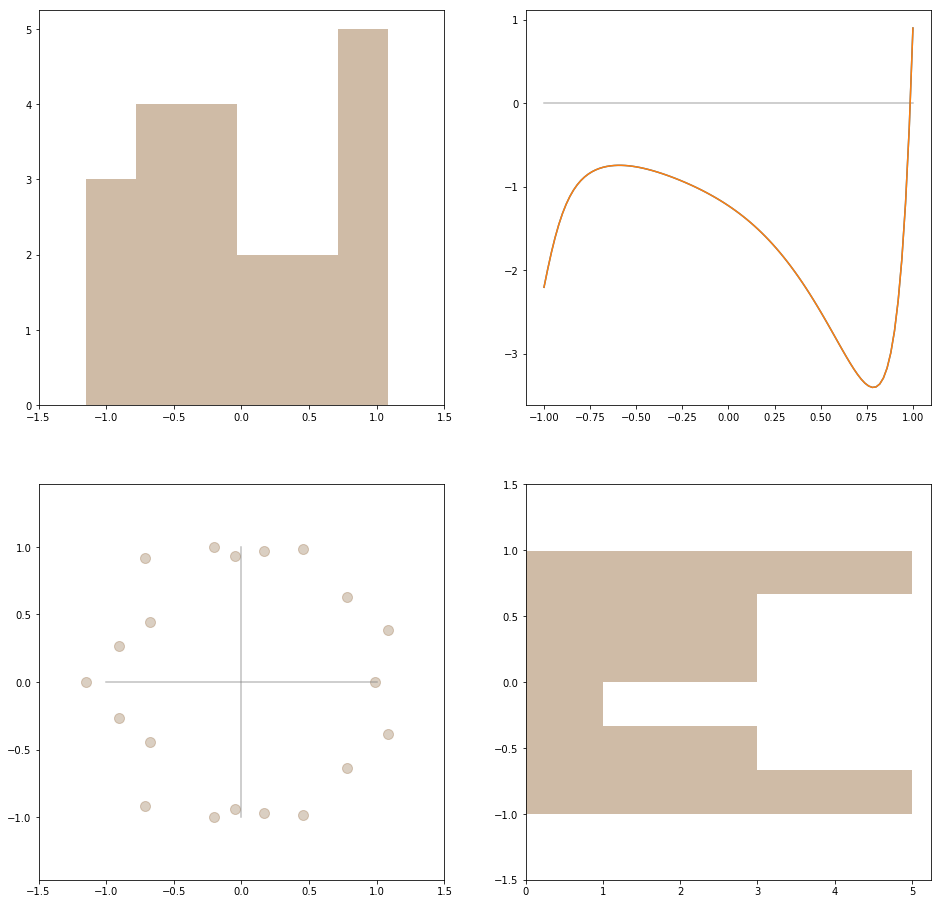

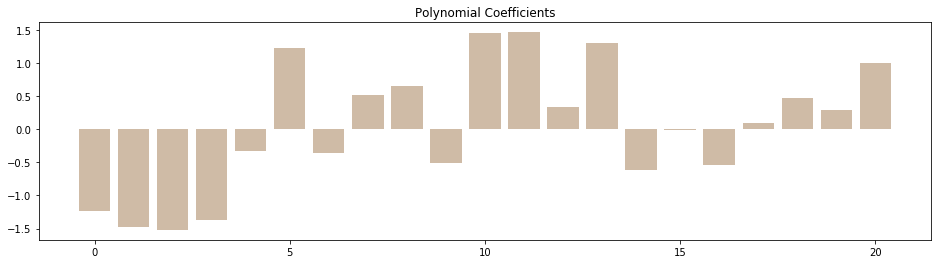

In [6]:
find_roots_x(20,correction=True)

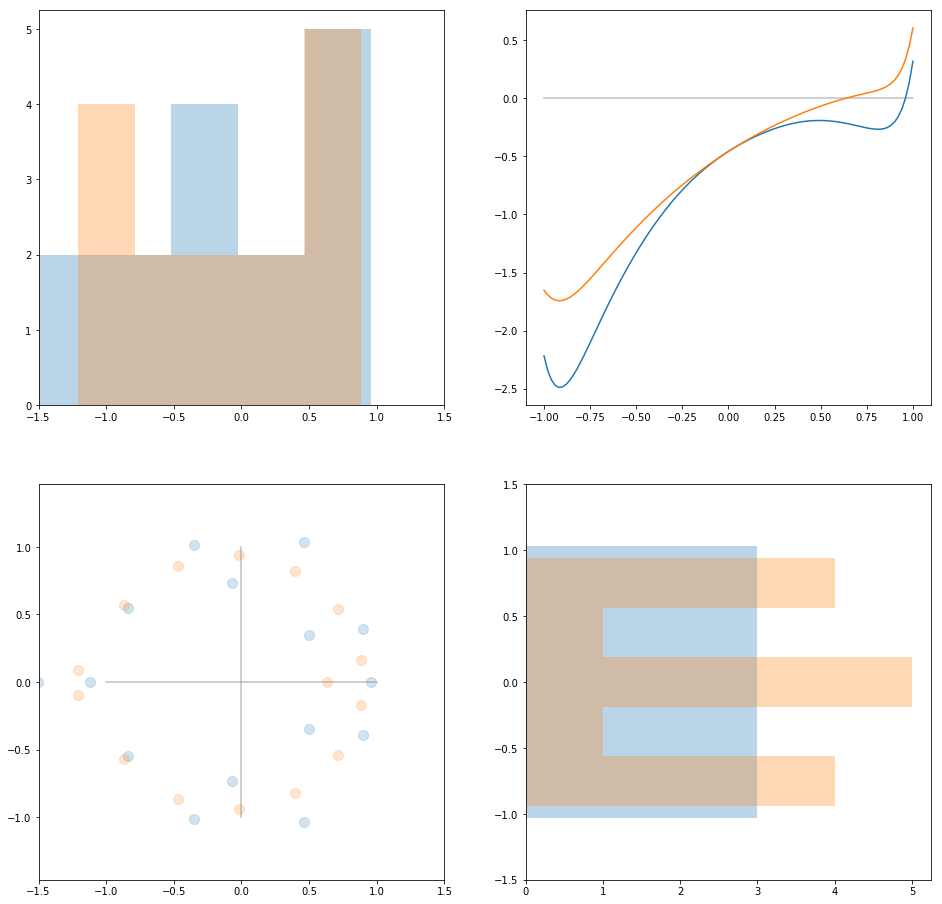

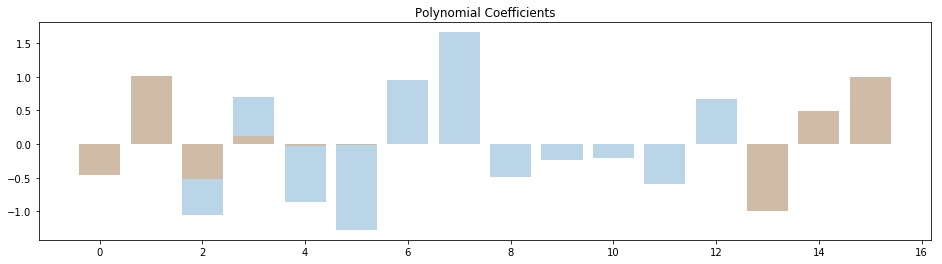

In [11]:
find_roots_x(15,correction=False)

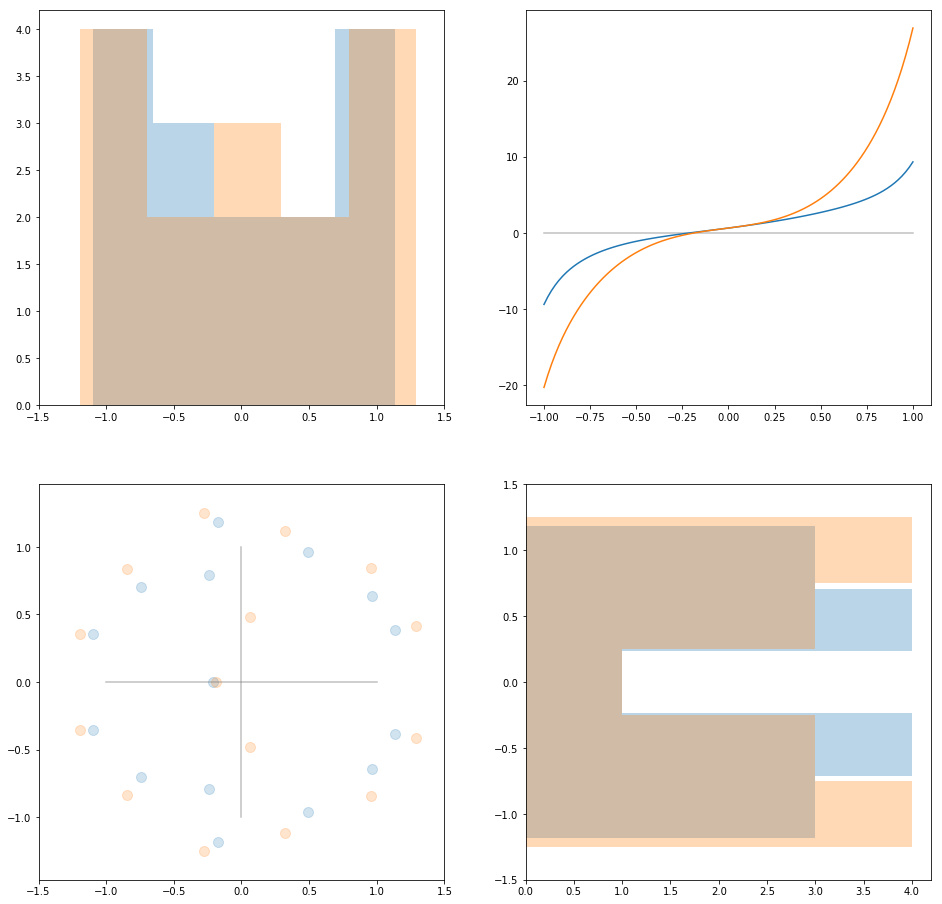

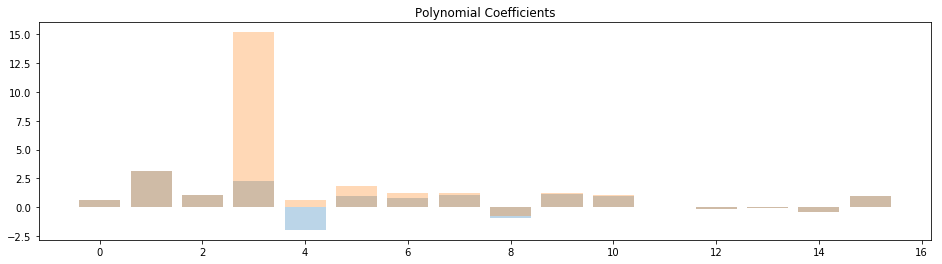

In [8]:
find_roots_x(15,stop_deg=12,perturb=[50,20])

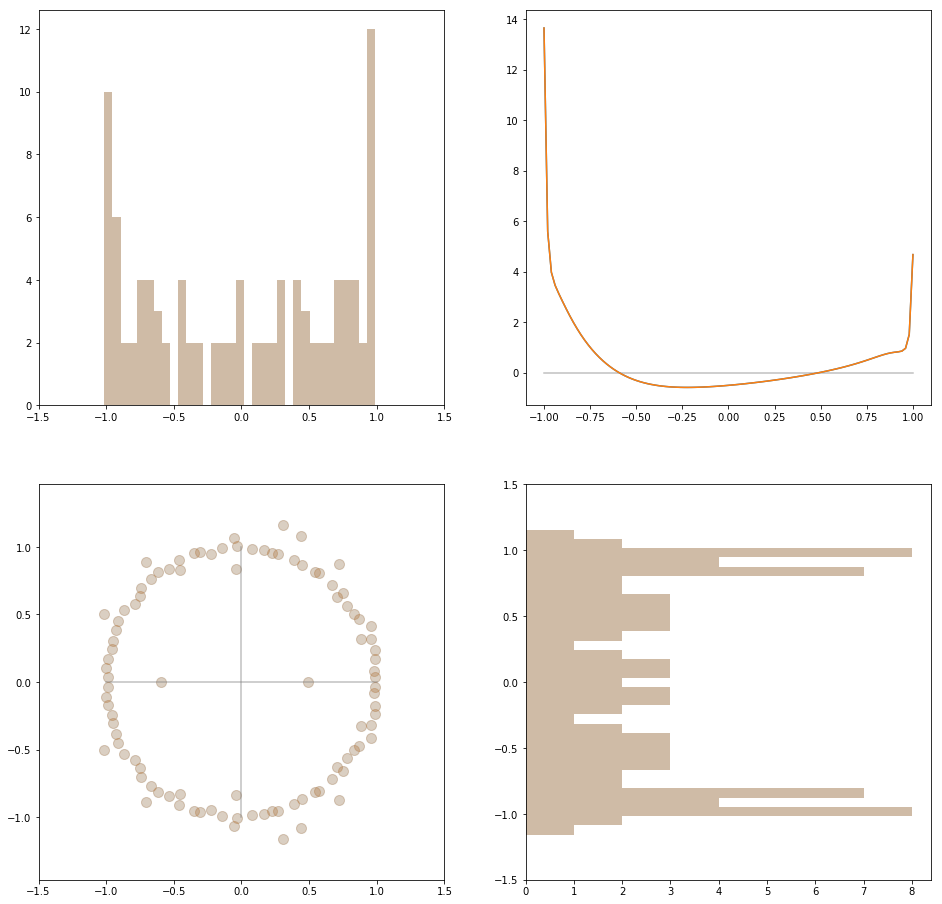

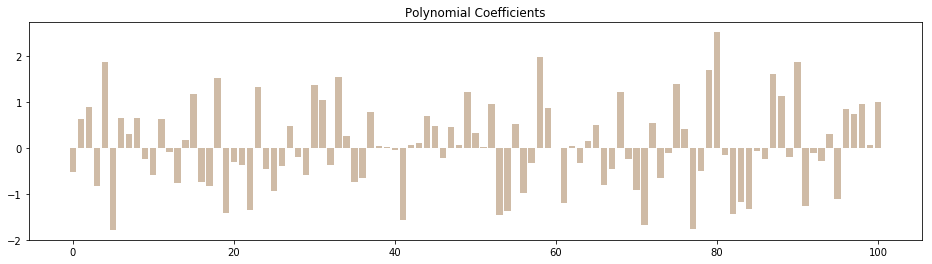

In [9]:
find_roots_x(100)